### Add scraped data into dataframe

In [17]:
from db import db, query, query_list
df = query('SELECT * FROM test_data')

In [19]:
df.head(2)

,beer_type,abv,size,kind,price,name,beer_url,description,bar_name,city,establishment_type,neighborhood,bar_url,address,grouping,origin
0,Pilsner,4.5,16oz,Draft,$8,Stone Street Tavern Pilsner,https://www.beermenus.com/beers/100056-stone-s...,"Light, crisp and refreshing.",Stone Street Tavern,"Manhattan, NY",Bar,Financial District,https://www.beermenus.com/places/2251-stone-st...,"52 Stone Street, New York, NY 10004",HOUSE BEERS,None
1,IPA,4.2,16oz,Draft,$9,Abita Hop 99,https://www.beermenus.com/beers/336182-abita-h...,Cut the carbs. Keep the craft. With only 99 ca...,Stone Street Tavern,"Manhattan, NY",Bar,Financial District,https://www.beermenus.com/places/2251-stone-st...,"52 Stone Street, New York, NY 10004",ON TAP,"Covington, LA"


In [111]:
# map columns to num type and remove leading/trailing characters

# df['size'] = df['size'].map(lambda x: x.rstrip('oz')).astype(int)
# df['price'] = df['price'].map(lambda x: x.lstrip('$')).astype(int)
# df['abv'] = df['abv'].astype(float)
# df['zip'] = df['address'].map(lambda x: x[-5:]).astype(int)

# added a price/oz column for comparison purposes
# df['price_per_oz'] = round(df['price']/df['size'],3)

# cleaned df
df2 = df.drop(['beer_url','bar_url'],axis=1)
# df2.info()
# df2.head(1)
df2

,beer_type,abv,size,kind,price,name,description,bar_name,city,establishment_type,neighborhood,address,grouping,origin,zip,price_per_oz
0,Pilsner,4.5,16,Draft,8,Stone Street Tavern Pilsner,"Light, crisp and refreshing.",Stone Street Tavern,"Manhattan, NY",Bar,Financial District,"52 Stone Street, New York, NY 10004",HOUSE BEERS,None,10004,0.500
1,IPA,4.2,16,Draft,9,Abita Hop 99,Cut the carbs. Keep the craft. With only 99 ca...,Stone Street Tavern,"Manhattan, NY",Bar,Financial District,"52 Stone Street, New York, NY 10004",ON TAP,"Covington, LA",10004,0.562
2,Cider,5.0,16,Draft,9,Austin Eastciders Original Dry Cider,"A crisp, smooth dry craft cider made with Euro...",Stone Street Tavern,"Manhattan, NY",Bar,Financial District,"52 Stone Street, New York, NY 10004",ON TAP,"Austin, TX",10004,0.562
3,IPA,7.0,16,Draft,9,Bell's Two Hearted Ale,Citrusy & piney IPA with 100% Centennial hops.,Stone Street Tavern,"Manhattan, NY",Bar,Financial District,"52 Stone Street, New York, NY 10004",ON TAP,"Comstock, MI",10004,0.562
4,Lager,5.2,16,Draft,9,Brooklyn Lager,Gold medal winner for Amber Lager at the 2018 ...,Stone Street Tavern,"Manhattan, NY",Bar,Financial District,"52 Stone Street, New York, NY 10004",ON TAP,"New York, NY",10004,0.562
5,NE/Hazy IPA,6.2,16,Draft,9,Firestone Walker Mind Haze,"Juicy yet balanced, hazy yet lasting, and load...",Stone Street Tavern,"Manhattan, NY",Bar,Financial District,"52 Stone Street, New York, NY 10004",ON TAP,"Paso Robles, CA",10004,0.562
6,Spiced Beer,5.2,16,Draft,9,Greenport Harbor Leaf Pile Pumpkin Ale,An autumn ale which brings you a slice of pump...,Stone Street Tavern,"Manhattan, NY",Bar,Financial District,"52 Stone Street, New York, NY 10004",ON TAP,"Greenport, NY",10004,0.562
7,Dry Stout,4.2,16,Draft,9,Guinness Draught Nitro,Nitrogenized Guinness is a dark stout beer tha...,Stone Street Tavern,"Manhattan, NY",Bar,Financial District,"52 Stone Street, New York, NY 10004",ON TAP,"St James's Gate, Dublin",10004,0.562
8,NE/Hazy IPA,6.8,9,Draft,8,Industrial Arts Wrench IPA,"A pithy explosion of aroma and flavor, beyond ...",Stone Street Tavern,"Manhattan, NY",Bar,Financial District,"52 Stone Street, New York, NY 10004",ON TAP,"Garnerville, NY",10004,0.889
9,IPA,6.2,16,Draft,8,Lagunitas IPA,"A well-rounded, highly drinkable IPA. A bit of...",Stone Street Tavern,"Manhattan, NY",Bar,Financial District,"52 Stone Street, New York, NY 10004",ON TAP,"Petaluma, CA",10004,0.500


In [123]:
import collections

# count the frequency of each price
counter = collections.Counter(df['price'])

In [124]:
# Convert frequency to probability - divide each frequency value by total number of values
pmf = []
for key,val in counter.items():
    pmf.append(val/df2.shape[0])

# price per oz of beers with frequency of these prices
print(counter.keys(), pmf)

dict_keys([8, 9]) [0.3125, 0.6875]


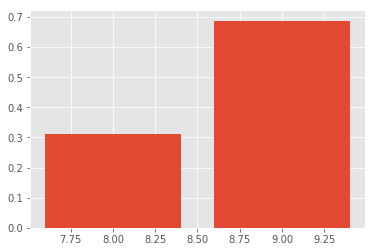

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(counter.keys(),pmf);

## Chi-square independence

### Are certain beer styles more popular in each borough?

###### H0: Borough has no effect on the popularity of a beer style.

###### Ha: (Style) IPAs are more popular in (borough) Brooklyn.

In [62]:
boroughs = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
styles = {
    'Pilsner':['Pils', 'Light', 'American Lager', 'Pale Lager'],
    'Wheat':['Hefewiezen', 'Hefeweizen', 'Wiess', 'Wit', 'Witbier'],
    'Lager':['Vienna'],
    'Stout':['Porter', 'Scotch', 'Smoked'],
    'Ale':['Pale Ale', 'Amber', 'Brown', 'Red', 'Saison', 'Bock', 'Dopplebock', 'Kolsch', 'Octoberfest', 'Cream' ],
    'IPA':['Session', 'Double IPA', 'IIPA', '2xIPA', '2XIPA', 'NEIPA'],
    'Sour':['Gose', 'Berliner Weisse'],
    'Imperial Stout':['Barley Wine'], 
    'Belgian Strong':['Tripel', 'Dubbel', 'Abbey'], 
    'Fruit':['Lambic', 'Pumpkin', 'Cider']
    }

In [69]:
for beer in counter.keys():
    if counter[beer] in styles.values():
        counter[beer] = styles[beer]
counter

Counter({'Pilsner': 1,
         'IPA': 3,
         'Cider': 2,
         'Lager': 1,
         'NE/Hazy IPA': 2,
         'Spiced Beer': 1,
         'Dry Stout': 1,
         'Witbier': 1,
         'Tripel': 1,
         'Porter': 1,
         'Pale Lager': 1,
         'Gose': 1})

In [16]:
# number of rows
r = len(styles.keys())
# columns
c = len(boroughs)
r,c
# calc degrees of freedom
df = (r-1)*(c-1)
df

36